# GROCERIES MARKET BASKET ANALYSIS 

## INTRODUCTION

 #### MARKET BASKET ANALYSIS

Market Basket Analysis is used by many companies, specially in retail and customer engagement such as Amazon, Netflix, and many other well-known firms to provide relevant product suggestions. Market Basket Analysis is an effective method for converting large volumes of consumer transaction and viewing data into key rules for product promotion and suggestion. In this report, we have explored the application of Apriori and Eclat algorithms and compared them on their effectiveness to the business case.

Market Basket Analysis techniques help us identify products that are frequently bought together using association principles and helps build recommendations. It performs by looking for item combinations that occur often in transactions.

#### ASSOCIATION

Association Rules, which are based on the notion of strong rules, are frequently used to analyze retail basket or transaction data. They are designed to find strong rules identified in transaction data using metrics of interestingness.
Association rule mining uncovers intriguing connections and linkages between vast collections of data objects. This rule displays the frequency with which an itemset appears in a transaction. Market Based Analysis is a common example.
For each algorithm we will using our data with different approach according to the algorithm need and analysis result according to the lift score and various value for better reach of market basket analysis to achieve profit.

## PROBLEM STATEMENT

- To implement Market Basket Analysis technique to find products most frequently bought together.

- Applying and Comparing APRIORI and ECLAT algorithms.

***Loading required libraries***

In [167]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder

## Loading Data

- The Dataset consists of various item which are brought by user in various transactions .​
- The Dataset is anonymized and contains a sample of over 10k rows with 32 unique items in the dataset transactions. ​
- Each transactions comes with  the sequence of products purchased in each order.

In [168]:
# Import csv file

#https://www.kaggle.com/irfanasrullah/groceries
dataset = pd.read_csv('groceries.csv',sep=',')

In [169]:
# View the dataset
# Each row of the dataset reflects products purchased on the same day at the same retailer.
# The dataset is sparse because a large fraction of the data is NA, NaN, or similar.
dataset.head(10)

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,whole milk,butter,yogurt,rice,abrasive cleaner,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,rolls/buns,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,other vegetables,UHT-milk,rolls/buns,bottled beer,liquor (appetizer),NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,potted plants,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,whole milk,cereals,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,tropical fruit,other vegetables,white bread,bottled water,chocolate,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [170]:
# dataset has 32 columns
dataset.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31'],
      dtype='object')

In [171]:
# Dataset has 9834 rows and 32 columns of products bought together in each row
dataset.shape

(9834, 32)

In [172]:
dataset.describe()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
count,9834,7675,6032,4733,3729,2874,2229,1684,1246,896,...,14,8,7,7,6,5,4,1,1,1
unique,158,151,155,152,150,137,138,140,128,120,...,13,7,6,7,5,4,3,1,1,1
top,sausage,whole milk,whole milk,whole milk,rolls/buns,soda,soda,shopping bags,soda,shopping bags,...,waffles,bottled beer,chocolate,chocolate,hygiene articles,napkins,house keeping products,skin care,hygiene articles,candles
freq,825,654,506,315,176,150,120,76,61,49,...,2,2,2,1,2,2,2,1,1,1


In [173]:
#As evident, the first column doesnot contain any null data as it represents atleast one-item is puchased. 
# Subsequently the count of null values increases across the column as the products bought together reduces.
dataset.isnull().head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,False,False,False,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,False,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,False,False,False,False,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,False,False,False,False,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4,False,False,False,False,False,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [174]:
dataset.isnull().sum().head(10)

0       0
1    2159
2    3802
3    5101
4    6105
5    6960
6    7605
7    8150
8    8588
9    8938
dtype: int64

In [175]:
# There are only 170 items in total including NaN that make up the entire dataset.
items = set()
for col in dataset:
    items.update(dataset[col].unique())
print(list(items))

len(items)

[nan, 'abrasive cleaner', 'frozen potato products', 'salty snack', 'soap', 'pork', 'whipped/sour cream', 'cake bar', 'curd', 'finished products', 'root vegetables', 'detergent', 'sparkling wine', 'UHT-milk', 'shopping bags', 'brown bread', 'specialty fat', 'butter milk', 'potted plants', 'tropical fruit', 'condensed milk', 'turkey', 'rolls/buns', 'rice', 'chicken', 'bottled beer', 'baby food', 'dish cleaner', 'soups', 'house keeping products', 'napkins', 'hard cheese', 'liquor', 'bathroom cleaner', 'male cosmetics', 'nut snack', 'chocolate marshmallow', 'liqueur', 'misc. beverages', 'rum', 'tea', 'flower (seeds)', 'Instant food products', 'frozen meals', 'baby cosmetics', 'kitchen towels', 'fish', 'liver loaf', 'cookware', 'cleaner', 'vinegar', 'hair spray', 'red/blush wine', 'candy', 'canned fruit', 'brandy', 'frankfurter', 'butter', 'frozen fish', 'processed cheese', 'pasta', 'tidbits', 'onions', 'pudding powder', 'oil', 'canned vegetables', 'cocoa drinks', 'white wine', 'white bread

170

In [176]:
dataset

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,whole milk,butter,yogurt,rice,abrasive cleaner,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9829,sausage,chicken,beef,hamburger meat,citrus fruit,grapes,root vegetables,whole milk,butter,whipped/sour cream,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9830,cooking chocolate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9831,chicken,citrus fruit,other vegetables,butter,yogurt,frozen dessert,domestic eggs,rolls/buns,rum,cling film/bags,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9832,semi-finished bread,bottled water,soda,bottled beer,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Preparation

In [177]:
#Creating list of transactions and removing the NaN Column
transactions = [] #list for each transactions
for i in range(0,len(dataset)): 
    transactions.append([str(dataset.values[i,j]) for j in range(32) if str(dataset.values[i,j])!='nan'])

In [178]:
TE = TransactionEncoder()
array = TE.fit(transactions).transform(transactions)

In [179]:
transactions

[['tropical fruit', 'yogurt', 'coffee'],
 ['whole milk'],
 ['pip fruit', 'yogurt', 'cream cheese', 'meat spreads'],
 ['other vegetables',
  'whole milk',
  'condensed milk',
  'long life bakery product'],
 ['whole milk', 'butter', 'yogurt', 'rice', 'abrasive cleaner'],
 ['rolls/buns'],
 ['other vegetables',
  'UHT-milk',
  'rolls/buns',
  'bottled beer',
  'liquor (appetizer)'],
 ['potted plants'],
 ['whole milk', 'cereals'],
 ['tropical fruit',
  'other vegetables',
  'white bread',
  'bottled water',
  'chocolate'],
 ['citrus fruit',
  'tropical fruit',
  'whole milk',
  'butter',
  'curd',
  'yogurt',
  'flour',
  'bottled water',
  'dishes'],
 ['beef'],
 ['frankfurter', 'rolls/buns', 'soda'],
 ['chicken', 'tropical fruit'],
 ['butter', 'sugar', 'fruit/vegetable juice', 'newspapers'],
 ['fruit/vegetable juice'],
 ['packaged fruit/vegetables'],
 ['chocolate'],
 ['specialty bar'],
 ['other vegetables'],
 ['butter milk', 'pastry'],
 ['whole milk'],
 ['tropical fruit',
  'cream cheese',

In [180]:
array

array([[False, False, False, ..., False,  True, False],
       [False, False, False, ...,  True, False, False],
       [False, False, False, ..., False,  True, False],
       ...,
       [False, False, False, ..., False,  True, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [181]:
# Building the data frame rows are logical and columns are the items have been purchased
df1 = pd.DataFrame(array, columns = TE.columns_)

In [182]:
# Transposed the dataframe to contain the product names in header and containing boolean values in transactions
# this is required step for applying the apriori algorithm
df1

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9829,False,False,False,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,True,False,False
9830,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9831,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
9832,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [183]:
df1[:10].dtypes

Instant food products    bool
UHT-milk                 bool
abrasive cleaner         bool
artif. sweetener         bool
baby cosmetics           bool
                         ... 
white bread              bool
white wine               bool
whole milk               bool
yogurt                   bool
zwieback                 bool
Length: 169, dtype: object

## Exploratory Data Analysis

***Most popular product bought***

bread is the most popular product often bought, followed by whole milk, vegetables, rolls/buns etc

In [184]:
#most popular items
count = df1.loc[:,:].sum()
df2 = count.sort_values(0, ascending = False).head(20)
df2 = df2.to_frame()
df2 = df2.reset_index()
df2 = df2.rename(columns = {"index": "items",0: "count"})
df2

,items,count
0,whole milk,2513
1,other vegetables,1903
2,rolls/buns,1809
3,soda,1715
4,yogurt,1372
5,bottled water,1087
6,root vegetables,1072
7,tropical fruit,1032
8,shopping bags,969
9,sausage,924


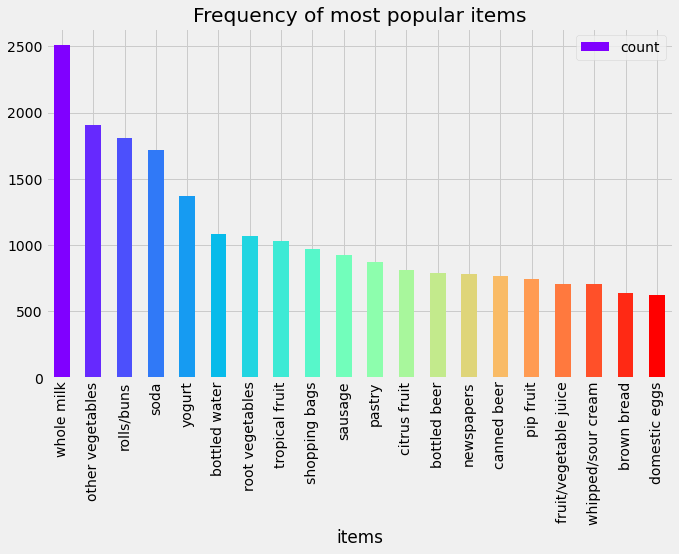

In [185]:
# Visual representation of above data for better insights
plt.rcParams['figure.figsize'] = (10, 6)
color = plt.cm.rainbow(np.linspace(0, 1, 20))
ax = df2.plot.bar(x = 'items', y = 'count',color = color)
plt.style.use('fivethirtyeight')
plt.title('Frequency of most popular items')
plt.show()

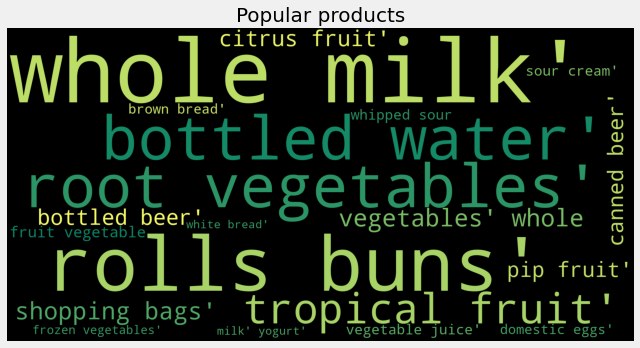

In [186]:
# A word cloud depicting the most occured products in the dataset
from wordcloud import WordCloud

new_df=[]
for i in transactions:
    for j in i:
        new_df.append(j)
        
plt.rcParams['figure.figsize'] = (10, 10)
wordcloud = WordCloud(width = 2000,  height = 1000, max_words = 20, colormap='summer').generate(str(new_df))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Popular products',fontsize = 20)
plt.show()

***Absolute and Running Total percentage of products***

In [187]:
tot_item = sum(df2["count"])
tot_item

df2['Item_percent'] = df2['count']/tot_item
df2['Tot_percent'] = df2.Item_percent.cumsum()
df2.head(10)


,items,count,Item_percent,Tot_percent
0,whole milk,2513,0.115027,0.115027
1,other vegetables,1903,0.087106,0.202133
2,rolls/buns,1809,0.082803,0.284936
3,soda,1715,0.078500,0.363437
4,yogurt,1372,0.062800,0.426237
5,bottled water,1087,0.049755,0.475992
6,root vegetables,1072,0.049069,0.525061
7,tropical fruit,1032,0.047238,0.572298
8,shopping bags,969,0.044354,0.616652
9,sausage,924,0.042294,0.658946


This shows us that the top 10 items are responsible for over 65% of the entire sales! This is important for us, as we don’t want to find association rules for items which are bought very infrequently. With this information we can limit the items we want to explore for creating our association rules. This also helps us in keeping our possible item set number to a manageable figure. 

## Measure of Association

Association Rules is a well-known and well-studied approach for identifying interesting relationships between itemsets in huge datasets. We begin by describing a few methods for measuring association.

1. **Support:** Its the default popularity of an item. The support, supp(X), measures how popular an itemset (X) is. It is calculated as the proportion of transactions in the data set which contain the itemset.


2. **Confidence:** Likelihood that customer who bought both X and Y. The confidence of a rule measures how likely item Y is purchased when item X is purchased, defined as *conf(X⇒Y)=supp(X∩Y)/supp(X)*. This is measured by the proportion of transactions with item X, in which item Y also appears.


3. **Lift:** Increase in the sale of X when you sell Y. Lift is a popular measure of to filter or rank found rules. It measures how likely item Y is purchased when item X is purchased, while controlling for how popular item Y is, which is defined as *lift(X⇒Y)=supp(X∩Y)/(supp(X)supp(Y))*. Lift can be interpreted as the deviation of the support of the whole rule from the support expected under independence given the supports of the LHS and the RHS. Greater than 1 lift values indicate stronger associations.


## APIORI Algorithm

The Apriori method presumes that any subset of a frequent itemset must also be frequent. It is the algorithm that underpins Market Basket Analysis. Apriori is a relational database method for mining frequent item sets and learning association rules. It then finds the most often occurring individual items in the database and expands them to larger and larger item sets as long as those item sets appear frequently enough in the database. Apriori's frequent item sets may be used to build association rules that emphasize broad trends in the database, which can be utilized for things like market basket analysis.

In [188]:
from apyori import apriori
import time

start = time.time()

frequent_itemsets = apriori(transactions, min_support = 0.01, min_confidence = 0.5)

# rules are generated for the items
result = list(frequent_itemsets)

end = time.time()
# time taken by APRIORI algorithm to run
print(end - start)

# finding associations having support as 0.01 and confidence 0.5

0.10956501960754395


##### Now we will go for the lift and association rules among the itemsets and then print lift and association rues and then get result which has the highest we give as optimal item set for market basket analysis. The threshold value of lift is greater than or equal to one. That means probability of buying one item after buying other is greater than or equal to 1.

In [189]:
association = []
support = []
confidence = []
lift = []
LHS = []
RHS = []
    
for i in range(0, len(result)):
    LHS.append(list(result[i][2][0][0]))
    RHS.append(list(result[i][2][0][1]))
    association.append(list(result[:len(result)][i][0]))
    support.append(result[:len(result)][i][1])
    confidence.append(result[:len(result)][i][2][0][2])
    lift.append(result[:len(result)][i][2][0][3])  

In [190]:
output = pd.DataFrame([association, LHS, RHS, support, confidence, lift]).transpose()
output.columns = ["Association","LHS", "RHS", "Support", "Confidence", "Lift"]

output.sort_values("Support", ascending = False).reset_index(drop=True)


,Association,LHS,RHS,Support,Confidence,Lift
0,"[yogurt, whole milk, other vegetables]","[yogurt, other vegetables]",[whole milk],0.0222697,0.512881,2.00703
1,"[yogurt, whole milk, tropical fruit]","[yogurt, tropical fruit]",[whole milk],0.0151515,0.517361,2.02456
2,"[whipped/sour cream, whole milk, other vegetab...","[whipped/sour cream, other vegetables]",[whole milk],0.0146431,0.507042,1.98418
3,"[yogurt, root vegetables, whole milk]","[yogurt, root vegetables]",[whole milk],0.0145414,0.562992,2.20313
4,"[pip fruit, whole milk, other vegetables]","[pip fruit, other vegetables]",[whole milk],0.0135245,0.51751,2.02515
5,"[yogurt, root vegetables, other vegetables]","[yogurt, root vegetables]",[other vegetables],0.0129144,0.5,2.58382
6,"[root vegetables, whole milk, rolls/buns]","[root vegetables, rolls/buns]",[whole milk],0.012711,0.523013,2.04668
7,"[whole milk, domestic eggs, other vegetables]","[domestic eggs, other vegetables]",[whole milk],0.0123043,0.552511,2.16212
8,"[root vegetables, tropical fruit, other vegeta...","[root vegetables, tropical fruit]",[other vegetables],0.0123043,0.584541,3.02069
9,"[root vegetables, rolls/buns, other vegetables]","[root vegetables, rolls/buns]",[other vegetables],0.0122026,0.502092,2.59463


The association rule for the combination yogurt and other vegetables implies that the whole milk is the most appropriate recommendation with a maximum value of support 0.0222697, confidence 0.512881 and lift 2.00703

In [191]:
output.sort_values("Confidence", ascending = False).reset_index(drop=True)

,Association,LHS,RHS,Support,Confidence,Lift
0,"[root vegetables, citrus fruit, other vegetables]","[root vegetables, citrus fruit]",[other vegetables],0.0103722,0.586207,3.0293
1,"[root vegetables, tropical fruit, other vegeta...","[root vegetables, tropical fruit]",[other vegetables],0.0123043,0.584541,3.02069
2,"[yogurt, whole milk, curd]","[yogurt, curd]",[whole milk],0.0100671,0.582353,2.27889
3,"[whole milk, butter, other vegetables]","[butter, other vegetables]",[whole milk],0.0114907,0.573604,2.24466
4,"[root vegetables, whole milk, tropical fruit]","[root vegetables, tropical fruit]",[whole milk],0.0119992,0.570048,2.23074
5,"[yogurt, root vegetables, whole milk]","[yogurt, root vegetables]",[whole milk],0.0145414,0.562992,2.20313
6,"[whole milk, domestic eggs, other vegetables]","[domestic eggs, other vegetables]",[whole milk],0.0123043,0.552511,2.16212
7,"[yogurt, whipped/sour cream, whole milk]","[yogurt, whipped/sour cream]",[whole milk],0.0108806,0.52451,2.05254
8,"[root vegetables, whole milk, rolls/buns]","[root vegetables, rolls/buns]",[whole milk],0.012711,0.523013,2.04668
9,"[pip fruit, whole milk, other vegetables]","[pip fruit, other vegetables]",[whole milk],0.0135245,0.51751,2.02515


In [192]:
output.sort_values("Lift", ascending = False).reset_index(drop=True)

,Association,LHS,RHS,Support,Confidence,Lift
0,"[root vegetables, citrus fruit, other vegetables]","[root vegetables, citrus fruit]",[other vegetables],0.0103722,0.586207,3.0293
1,"[root vegetables, tropical fruit, other vegeta...","[root vegetables, tropical fruit]",[other vegetables],0.0123043,0.584541,3.02069
2,"[root vegetables, rolls/buns, other vegetables]","[root vegetables, rolls/buns]",[other vegetables],0.0122026,0.502092,2.59463
3,"[yogurt, root vegetables, other vegetables]","[yogurt, root vegetables]",[other vegetables],0.0129144,0.5,2.58382
4,"[yogurt, whole milk, curd]","[yogurt, curd]",[whole milk],0.0100671,0.582353,2.27889
5,"[whole milk, butter, other vegetables]","[butter, other vegetables]",[whole milk],0.0114907,0.573604,2.24466
6,"[root vegetables, whole milk, tropical fruit]","[root vegetables, tropical fruit]",[whole milk],0.0119992,0.570048,2.23074
7,"[yogurt, root vegetables, whole milk]","[yogurt, root vegetables]",[whole milk],0.0145414,0.562992,2.20313
8,"[whole milk, domestic eggs, other vegetables]","[domestic eggs, other vegetables]",[whole milk],0.0123043,0.552511,2.16212
9,"[yogurt, whipped/sour cream, whole milk]","[yogurt, whipped/sour cream]",[whole milk],0.0108806,0.52451,2.05254


The association rule for the combination root vegetables and citrus fruit implies that the other vegetables is the most appropriate recommendation with a support 0.0103722, maximum value of confidence 0.586207 and lift 3.0293 both.

#### Data Visualization - Apriori

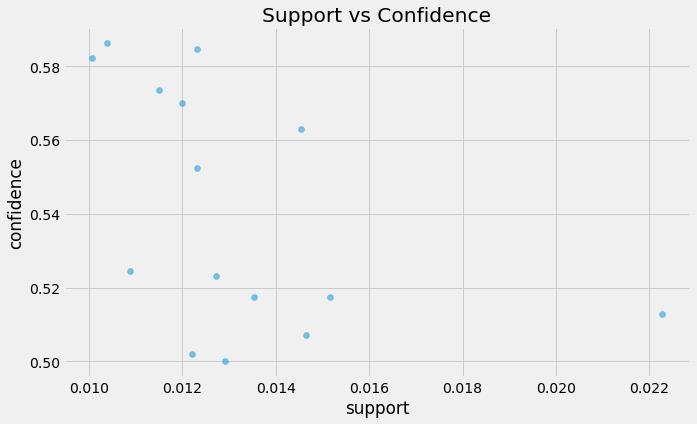

In [193]:
# Support vs Confidence

plt.rcParams['figure.figsize'] = (10, 6)
plt.scatter(output['Support'], output['Confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

There are 15 association rules interpreted with a maximum support of 0.0222697,and maximum value of confidence 0.586207. Most of the associations lie in the range having support from 0.01 to 0.016

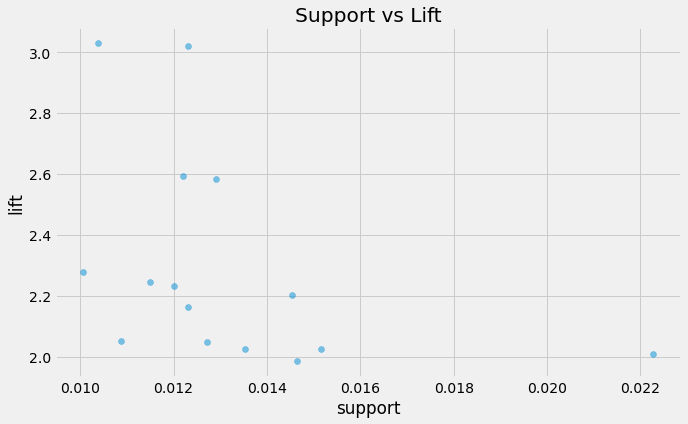

In [194]:
#  Support vs Lift

plt.rcParams['figure.figsize'] = (10, 6)
plt.scatter(output["Support"], output["Lift"], alpha=0.5)
plt.xlabel("support")
plt.ylabel("lift")
plt.title("Support vs Lift")
plt.show()

There are 15 association rules interpreted with a maximum support of 0.0222697,and maximum value of lift 3.0293. 
Most of the associations lie in the range having support from 0.01 to 0.016

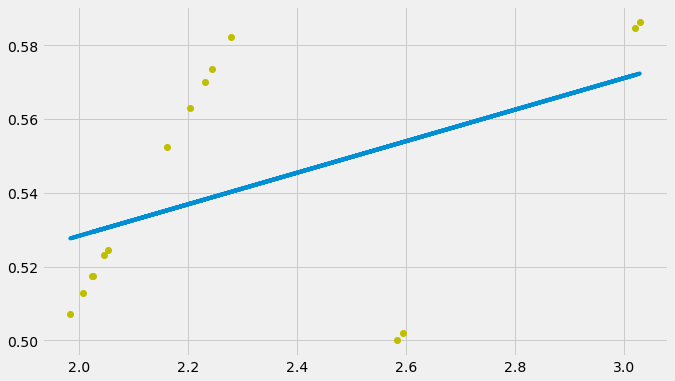

In [195]:
# Lift vs Confidence

plt.rcParams['figure.figsize'] = (10, 6)
fit = np.polyfit(np.array(output["Lift"],dtype=float), np.array(output["Confidence"],dtype=float),1)
fit_fn = np.poly1d(fit)
plt.plot(np.array(output["Lift"],dtype=float), np.array(output["Confidence"],dtype=float), "yo" ,np.array(output["Lift"],dtype=float), 
 fit_fn(np.array(output["Lift"],dtype=float)))

This shows that as the confidence increase, lift increases. Here, the maximum confidence is around 0.586207,and maximum lift is 3.0293. 

#### Advantages of Apriori Algorithm:
1. It is an easy to implement and easy to understand algorithm.
2. It may be used on large item sets.

#### Drawbacks of the Apriori Algorithm:-

1. At each step, candidate sets have to be built.
2. To build the candidate sets, the algorithm has to repeatedly scan the database.

To overcome this we have use algorithm éclat for avoid repeation and have a faster in terms of searching method for relation.

## ECLAT ALGORITHM

Equivalence Class Clustering and Bottom-up Lattice Traversal is the acronym for the ECLAT algorithm. It is one of the most often used Association Rule mining techniques. It is a faster and more scalable variant of the Apriori algorithm. While the Apriori algorithm works horizontally, mimicking a graph's Breadth-First Search, the ECLAT method works vertically, mimicking a graph's Depth-First Search. The ECLAT method is quicker than the Apriori algorithm due to its vertical approach.

### One Hot Encoding

One hot encoding is a way of transforming data in order to prepare it for an algorithm and improve prediction. We use one-hot to transform each category value into a new categorical column and assign it a binary value of 1 or 0. A binary vector is used to represent each integer value. The values are all zero, and the index is denoted by a 1.

In [196]:
itemset = set(items)
encoded_vals = []
for index, row in dataset.iterrows():
    rowset = set(row) 
    labels = {}
    uncommons = list(itemset - rowset)
    commons = list(itemset.intersection(rowset))
    for uc in uncommons:
        labels[uc] = 0
    for com in commons:
        labels[com] = 1
    encoded_vals.append(labels)
encoded_vals[0]

ohe_dataset = pd.DataFrame(encoded_vals)

In [197]:
ohe_dataset

,abrasive cleaner,frozen potato products,salty snack,soap,pork,whipped/sour cream,cake bar,curd,finished products,root vegetables,...,ready soups,beverages,domestic eggs,other vegetables,herbs,citrus fruit,yogurt,NaN,tropical fruit,coffee
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9829,0,0,1,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,1,0,1
9830,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9831,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,1,1,1,0,0
9832,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [198]:
# Dropping NaN columns to handle the null values
ohe_dataset = ohe_dataset.drop(ohe_dataset.columns[[167]], axis=1) 

In [199]:
from mlxtend.frequent_patterns import apriori, association_rules

start = time.time()

freq_items = apriori(ohe_dataset, min_support= 0.01, use_colnames=True, verbose=1)
freq_items.head(10)

end = time.time()
print(end - start)

Processing 236 combinations | Sampling itemset size 43
1.0874619483947754


In [200]:
freq_items.sort_values('support', ascending = False).reset_index(drop=True).head(10)

,support,itemsets
0,0.255542,(whole milk)
1,0.193512,(other vegetables)
2,0.183954,(rolls/buns)
3,0.174395,(soda)
4,0.139516,(yogurt)
5,0.110535,(bottled water)
6,0.109010,(root vegetables)
7,0.104942,(tropical fruit)
8,0.098536,(shopping bags)
9,0.093960,(sausage)


In [201]:
rules = association_rules(freq_items, metric="confidence", min_threshold=0.01, support_only= False)

rules.sort_values('lift', ascending = False).reset_index(drop=True).head(100)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(yogurt, whole milk)",(curd),0.056030,0.053285,0.010067,0.179673,3.371961,0.007082,1.154071
1,(curd),"(yogurt, whole milk)",0.053285,0.056030,0.010067,0.188931,3.371961,0.007082,1.163859
2,(root vegetables),"(citrus fruit, other vegetables)",0.109010,0.028879,0.010372,0.095149,3.294710,0.007224,1.073238
3,"(citrus fruit, other vegetables)",(root vegetables),0.028879,0.109010,0.010372,0.359155,3.294710,0.007224,1.390337
4,"(yogurt, other vegetables)",(whipped/sour cream),0.043421,0.071690,0.010169,0.234192,3.266730,0.007056,1.212197
...,...,...,...,...,...,...,...,...,...
95,(yogurt),(cream cheese),0.139516,0.039658,0.012406,0.088921,2.242184,0.006873,1.054071
96,(whole milk),"(root vegetables, tropical fruit)",0.255542,0.021049,0.011999,0.046956,2.230742,0.006620,1.027183
97,"(root vegetables, tropical fruit)",(whole milk),0.021049,0.255542,0.011999,0.570048,2.230742,0.006620,1.731492
98,(citrus fruit),"(yogurt, whole milk)",0.082672,0.056030,0.010270,0.124231,2.217223,0.005638,1.077876


In [202]:
rules.sort_values('lift', ascending = False).reset_index(drop=True)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(yogurt, whole milk)",(curd),0.056030,0.053285,0.010067,0.179673,3.371961,0.007082,1.154071
1,(curd),"(yogurt, whole milk)",0.053285,0.056030,0.010067,0.188931,3.371961,0.007082,1.163859
2,(root vegetables),"(citrus fruit, other vegetables)",0.109010,0.028879,0.010372,0.095149,3.294710,0.007224,1.073238
3,"(citrus fruit, other vegetables)",(root vegetables),0.028879,0.109010,0.010372,0.359155,3.294710,0.007224,1.390337
4,"(yogurt, other vegetables)",(whipped/sour cream),0.043421,0.071690,0.010169,0.234192,3.266730,0.007056,1.212197
...,...,...,...,...,...,...,...,...,...
613,(soda),(whole milk),0.174395,0.255542,0.040065,0.229738,0.899021,-0.004500,0.966499
614,(citrus fruit),(soda),0.082672,0.174395,0.012813,0.154982,0.888681,-0.001605,0.977026
615,(soda),(citrus fruit),0.174395,0.082672,0.012813,0.073469,0.888681,-0.001605,0.990067
616,(rolls/buns),(canned beer),0.183954,0.077690,0.011287,0.061360,0.789808,-0.003004,0.982603


In [203]:
rules[ (rules['confidence'] >= 0.5)].sort_values('lift', ascending = False).reset_index(drop=True)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(root vegetables, citrus fruit)",(other vegetables),0.017694,0.193512,0.010372,0.586207,3.029300,0.006948,1.949012
1,"(root vegetables, tropical fruit)",(other vegetables),0.021049,0.193512,0.012304,0.584541,3.020692,0.008231,1.941197
2,"(root vegetables, rolls/buns)",(other vegetables),0.024303,0.193512,0.012203,0.502092,2.594626,0.007500,1.619753
3,"(yogurt, root vegetables)",(other vegetables),0.025829,0.193512,0.012914,0.500000,2.583815,0.007916,1.612975
4,"(yogurt, curd)",(whole milk),0.017287,0.255542,0.010067,0.582353,2.278893,0.005650,1.782505
5,"(butter, other vegetables)",(whole milk),0.020033,0.255542,0.011491,0.573604,2.244657,0.006372,1.745931
6,"(root vegetables, tropical fruit)",(whole milk),0.021049,0.255542,0.011999,0.570048,2.230742,0.006620,1.731492
7,"(yogurt, root vegetables)",(whole milk),0.025829,0.255542,0.014541,0.562992,2.203130,0.007941,1.703535
8,"(domestic eggs, other vegetables)",(whole milk),0.022270,0.255542,0.012304,0.552511,2.162116,0.006613,1.663636
9,"(yogurt, whipped/sour cream)",(whole milk),0.020744,0.255542,0.010881,0.524510,2.052539,0.005580,1.565664


Keeping minimum support as 0.01 and confidence value equal to and more than 0.5, There are 15 association rules interpreted with a maximum support of 0.0222697, maximum value of confidence 0.586207 and lift as 3.029300. 

We have observed that the association rules from both these algorithms are same with same metrices. Since The dataset 
has 10,000 records which is not so large and small, both algorithms can be considered for the analysis. However, The 
time consumed by ECLAT is more than the apriori, which in turns suggests that the Apriori algorithm is the better 
technique and most preferred over ECLAT or other algorithms.

#### Data Visualizations - Eclat

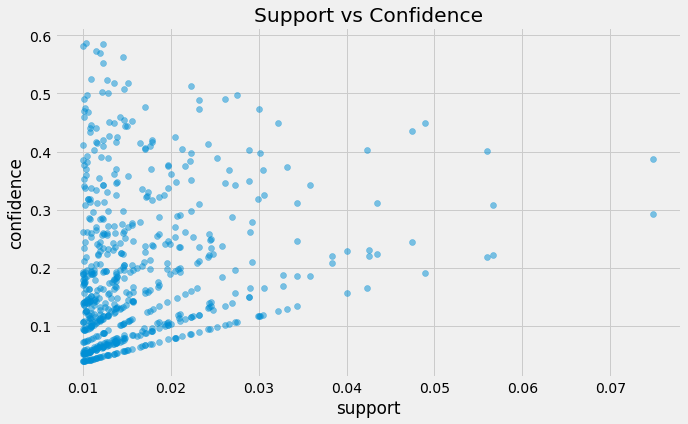

In [204]:
# Support vs Confidence

plt.rcParams['figure.figsize'] = (10, 6)
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

There are 618 association rules interpreted with a maximum support of 0.0222697,and maximum value of confidence 0.179673. Most of the associations lie in the range having support from 0.01 to 0.02. There are just two combinations where the support gives more than 0.07 with a confidence ranges from 0.3 to 0.4.

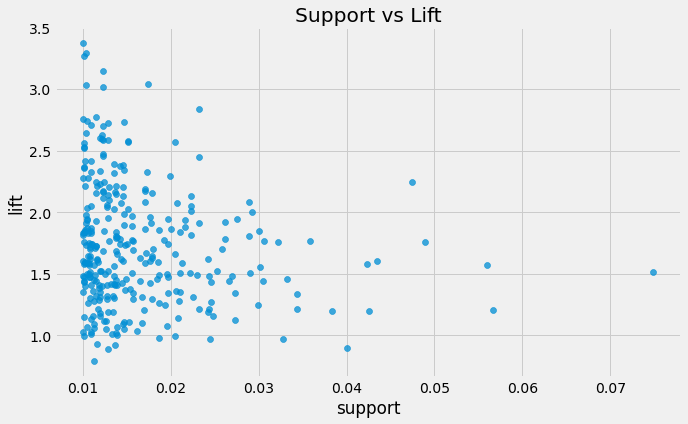

In [205]:
#  Support vs Lift

plt.rcParams['figure.figsize'] = (10, 6)
plt.scatter(rules["support"], rules["lift"], alpha=0.5)
plt.xlabel("support")
plt.ylabel("lift")
plt.title("Support vs Lift")
plt.show()


There are 618 association rules interpreted with a maximum support of 0.0222697,and maximum value of lift 0.371961. Most of the associations lie in the range having support from 0.01 to 0.02. There are just one combination where the support gives more than 0.07 with a lift value as 1.5

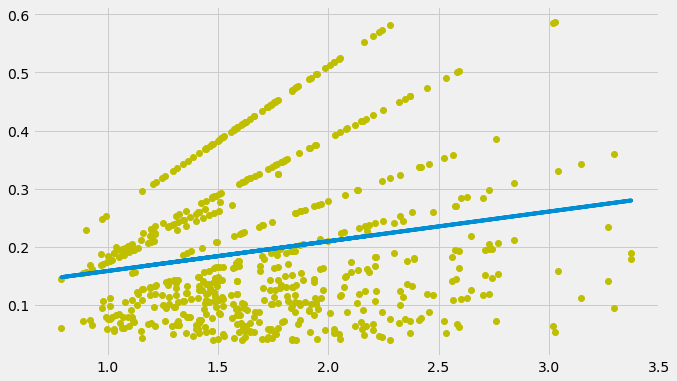

In [206]:
# Lift vs Confidence

plt.rcParams['figure.figsize'] = (10, 6)
fit = np.polyfit(rules["lift"], rules["confidence"],1)
fit_fn = np.poly1d(fit)
plt.plot(rules["lift"], rules["confidence"], "yo" , rules["lift"], 
 fit_fn(rules["lift"]))


The following interpretation shows that the 618 associations rules having confidence directly propotional to the lift. Here, the maximum confidence is around 0.586207,and maximum lift is 3.0293. Also, there are 13 combinations where the lift value is more than 3. 


#### Advantages of ECLAT

1. Because the Eclat algorithm employs a Depth-First Search strategy, it requires less memory than the Apriori method.
2. The Eclat method is obviously quicker than the Apriori algorithm.
3. The Eclat method does not involve recurrent data scanning in order to compute individual support values.
4. This technique is best suited for small and medium datasets, whereas the Apriori algorithm is best suited for large datasets.
5. In contrast to Apriori, the Eclat algorithm searches the presently produced dataset.

#### Disadvantages of ECLAT

Intermediate Tidsets generated by the Eclat method take up more memory.

## Conclusion:

The most popular item in this data set is whole milk followed by vegetables and rolls/buns.

By applying association rules through the Apriori and ECLAT algorithm, we can have a better insight on what items are more likely to be bought together. 

We have also compared the time taken to execute these algorithms in which Apriori works better for larger dataset and ECLAT for small dataset.

## References:

1. https://xiaoruizhu.github.io/Data-Mining-R/lecture/11_AssociationRules.html
2. https://www.kdnuggets.com/2019/12/market-basket-analysis.html
3. https://karan18csu103.medium.com/market-basket-analysis-usinhhg-association-rule-mining-with-apriori-eclat-and-fpgrowth-algorithm-6a9737c1f573